<br><br>
<p align="center">
  <img src="https://www.galileo.edu/wp-content/uploads/2023/01/Galileo-Sin-slogan.png" alt="Ejemplo de Imagen" width="400"/>
</p>

<br><br>
<center>
  Donovan Caballeros | 0734-3020 
  
  Text Mining & Image Recognition


</center>


<center>
  <h1 style="font-size: 2em;">UNIVERSIDAD GALILEO</h1>
  <h1 style="font-size: 2em;">MAESTRÍA EN BUSINESS INTELLIGENCE</h1>
  <p style="font-size: 1.5em;">Laboratorio 2</p>
</center>

# Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [14]:
import cv2
import numpy as np

def binarizar_imagen(ruta_imagen, umbral=127):
    # Carga imagne
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Valida que se cargó bien la imagen
    if imagen is None:
        raise ValueError("Error al cargar la imagen.")
    
    # Binarización
    _, imagen_binarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada
 
ruta_imagen = 'lab2.jpg'
imagen_binarizada = binarizar_imagen(ruta_imagen, umbral=115)

# Mostrar la imagen binarizada
cv2.imshow('Imagen Binarizada', imagen_binarizada)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar imagen
cv2.imwrite('imagen_binarizada.jpg', imagen_binarizada)


True

# Problema 2
Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones logicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [18]:
import cv2
import numpy as np

def operaciones(r_imagen1, r_imagen2, umbral=127):
 
    # Cargar de imagenes 
    imagen1 = cv2.imread(r_imagen1)
    imagen2 = cv2.imread(r_imagen2)
    
    # Verificar que ambas imágenes se cargaron correctamente
    if imagen1 is None or imagen2 is None:
        raise ValueError("Error a cargar las imágenes.")
    
    # Valida que las 2 imagnes cargadas seasn de las mismas dimensiones
    if imagen1.shape != imagen2.shape:
        raise ValueError("Las imágenes no tienen el mismo tamaño.")
    
    # Convierte a escala de grises
    gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
    gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)
    
    # Binarización
    _, binarizada1 = cv2.threshold(gris1, umbral, 255, cv2.THRESH_BINARY)
    _, binarizada2 = cv2.threshold(gris2, umbral, 255, cv2.THRESH_BINARY)
    
    # Operaciones
    suma = cv2.add(imagen1, imagen2)
    resta = cv2.subtract(imagen1, imagen2)
    and_op = cv2.bitwise_and(binarizada1, binarizada2)
    or_op = cv2.bitwise_or(binarizada1, binarizada2)
    xor_op = cv2.bitwise_xor(binarizada1, binarizada2)
    
    # Guardar los resultados
    resultados = {
        "suma": suma,
        "resta": resta,
        "and": and_op,
        "or": or_op,
        "xor": xor_op
    }
    
    return resultados

# Ejemplo de uso
r_imagen1 = 'p2-lab2.jpg'
r_imagen2 = 'p2-lab2_.jpg'
resultados = operaciones(r_imagen1, r_imagen2, umbral=127)

# Muestra los resultados en pantallla
cv2.imshow('Suma', resultados['suma'])
cv2.imshow('Resta', resultados['resta'])
cv2.imshow('AND', resultados['and'])
cv2.imshow('OR', resultados['or'])
cv2.imshow('XOR', resultados['xor'])
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar imagenes
cv2.imwrite('resultado_suma.jpg', resultados['suma'])
cv2.imwrite('resultado_resta.jpg', resultados['resta'])
cv2.imwrite('resultado_and.jpg', resultados['and'])
cv2.imwrite('resultado_or.jpg', resultados['or'])
cv2.imwrite('resultado_xor.jpg', resultados['xor'])


True

# Problema 3
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

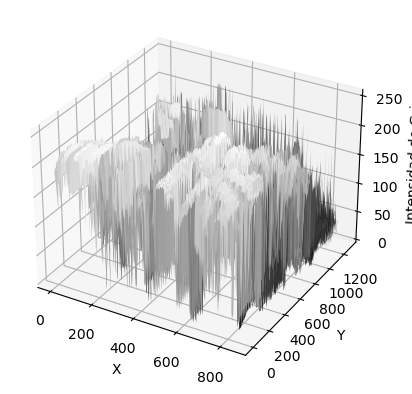

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualizar_imagen_3d(ruta_imagen):
    """
    Función que visualiza una imagen en escala de grises en 3D, donde Z representa la intensidad del gris.
    
    Parámetros:
    - ruta_imagen: Ruta de la imagen en escala de grises.
    """
    
    # Cargar la imagen en escala de grises
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que la imagen se cargó correctamente
    if imagen is None:
        raise ValueError("No se pudo cargar la imagen. Verifique la ruta del archivo.")
    
    # Crear una malla de coordenadas (X, Y)
    x = np.arange(0, imagen.shape[1])
    y = np.arange(0, imagen.shape[0])
    x, y = np.meshgrid(x, y)
    
    # Intensidades de gris (Z)
    z = imagen
    
    # Crear la figura y el eje 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Gráfico de superficie
    ax.plot_surface(x, y, z, cmap='gray')
    
    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la visualización
    plt.show()

# Ejemplo de uso
ruta_imagen = 'p3-lab2.jpg'
visualizar_imagen_3d(ruta_imagen)


# Problema 4
Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [28]:
def transformar_negativa(imagen):
    return 255 - imagen

In [29]:
# Transofmación lineal
def transformar_lineal(imagen, a=1.0, b=0):
    imagen_transformada = a * imagen + b
    return np.clip(imagen_transformada, 0, 255).astype(np.uint8)

In [30]:
# Tranformacion logaritmica
def transformar_logaritmica(imagen, c=1.0):
    imagen_transformada = c * np.log1p(imagen)
    imagen_transformada = (imagen_transformada / np.max(imagen_transformada)) * 255
    return imagen_transformada.astype(np.uint8)

In [31]:
#tranformacion exponencial

def transformar_exponencial(imagen, c=1.0, gamma=1.0):
    imagen_transformada = c * np.power(imagen / 255.0, gamma)
    imagen_transformada = (imagen_transformada * 255).astype(np.uint8)
    return imagen_transformada

In [26]:
# Cargar imagen en escala de grises
ruta_imagen = 'p4-lab2.jpg'
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Aplicar transformaciones
imagen_negativa = transformar_negativa(imagen)
imagen_lineal = transformar_lineal(imagen, a=1.2, b=20)
imagen_logaritmica = transformar_logaritmica(imagen, c=30)
imagen_exponencial = transformar_exponencial(imagen, c=1.0, gamma=2.0)

# Mostrar las imágenes transformadas
cv2.imshow('Original', imagen)
cv2.imshow('Negativa', imagen_negativa)
cv2.imshow('Lineal', imagen_lineal)
cv2.imshow('Logarítmica', imagen_logaritmica)
cv2.imshow('Exponencial', imagen_exponencial)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Problema 5
Investigue que hace el kernel Laplaciano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

### Kernel Laplaciano

##### Es un filtro para la detección de bordes que se basa en las derivadas de segundo orden de la imagen. Las derivadas de segundo orden miden la curvatura o la tasa de cambio del gradiente, lo que indica la presencia de una arista. El filtro laplaciano utiliza un solo núcleo, generalmente uno de 3x3 o 5x5, que se convuelve con la imagen. El kernel está diseñado para tener una suma cero, lo que significa que tiene valores positivos en el centro y valores negativos en los píxeles circundantes. De esta manera, mejora los bordes y suprime las regiones planas. Las ventajas del filtro laplaciano son que es isotrópico, lo que significa que detecta bordes en todas las direcciones por igual, y que produce bordes delgados y afilados. Las desventajas son que es muy sensible al ruido, ya que amplifica cualquier pequeña variación en la intensidad del píxel, y que no proporciona información sobre la dirección u orientación del borde.

### Algoritmo de Canny

##### El propósito de Canny era descubrir el algoritmo óptimo de detección de bordes. Para que un detector de bordes pueda ser considerado óptimo debe cumplir los siguientes puntos:

##### Buena detección- el algoritmo debe marcar el mayor número real en los bordes de la imagen como sea posible.
##### Buena localización- los bordes de marca deben estar lo más cerca posible del borde de la imagen real.
##### Respuesta mínima - El borde de una imagen sólo debe ser marcado una vez, y siempre que sea posible, el ruido de la imagen no debe crear falsos bordes.
##### Para satisfacer estos requisitos Canny utiliza el cálculo de variaciones - una técnica que encuentra la función que optimiza un funcional indicado. La función óptima en el algoritmo de Canny es descrito por la suma de cuatro términos exponenciales, pero se puede aproximar por la primera derivada de una gaussiana.

### Diferencias Clave

##### Ruido: El Laplaciano es más sensible al ruido debido a que utiliza la segunda derivada, que amplifica las variaciones pequeñas. El algoritmo de Canny, en cambio, incluye un paso de suavizado para reducir el impacto del ruido.

##### Etapas del Proceso: El kernel Laplaciano es un proceso simple y directo, mientras que Canny es un algoritmo multi-etapa que busca mejorar la precisión y reducir los falsos positivos.

##### Control sobre la Detección: Canny proporciona un mayor control sobre la detección de bordes mediante la ajustabilidad de sus parámetros, mientras que el Laplaciano es más limitado en este aspecto.

##### Uso Práctico: Canny es más adecuado para aplicaciones donde se requiere una detección de bordes precisa y controlada, mientras que el Laplaciano se usa en aplicaciones más simples o cuando la velocidad es más importante que la precisión.